In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('test_1.csv') #read the csv data

In [3]:
df.head()

,A,B,C,D,E,F,G
0,21.6,292.0,65,3,22.19,24.51,29.06
1,36.0,122.4,65,3,9.31,10.29,12.20
2,36.0,187.2,65,3,14.24,15.73,18.65
3,36.0,252.0,65,3,19.18,21.18,25.11
4,36.0,374.4,65,3,37.31,31.46,37.31


In [4]:
df.shape

(300, 7)

In [5]:
df['G'] = df['G'].astype(int)
print(df.dtypes)

A    float64
B    float64
C      int64
D      int64
E    float64
F    float64
G      int32
dtype: object


In [6]:
df['E'] = df['E'].astype(int)
print(df.dtypes)

A    float64
B    float64
C      int64
D      int64
E      int32
F    float64
G      int32
dtype: object


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
scaler.fit(df.drop(['G'],axis=1))

StandardScaler()

In [10]:
scaled_features=scaler.transform(df.drop(['G'],axis=1))

In [11]:
scaled_features.shape

(300, 6)

In [12]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,A,B,C,D,E,F
0,-2.885881,-1.167133,-1.151339,-0.95767,-0.702862,-0.698646
1,-1.014633,-1.927956,-1.151339,-0.95767,-1.579753,-1.569609
2,-1.014633,-1.637264,-1.151339,-0.95767,-1.242487,-1.236414
3,-1.014633,-1.346572,-1.151339,-0.95767,-0.905222,-0.902606
4,-1.014633,-0.797488,-1.151339,-0.95767,0.308936,-0.272965


In [20]:
# sns.pairplot(data=df,hue='G')

In [14]:
from sklearn.model_selection import train_test_split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df[['G']],
                                                    test_size=0.30)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)


In [36]:
knn.fit(X_train,y_train)

C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [37]:
pred = knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [39]:
print(confusion_matrix(y_test,pred))


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


In [40]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         1
          25       0.50      1.00      0.67         1
          26       0.00      0.00      0.00         1
          29       1.00      1.00      1.00         1
          30       1.00      1.00      1.00         2
          31       1.00      1.00      1.00         2
          32       1.00    

C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\metr

In [42]:
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['G'],cv=10)
    accuracy_rate.append(score.mean())

C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgit

In [43]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['G'],cv=10)
    error_rate.append(1-score.mean())

C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nexgit

Text(0, 0.5, 'Error Rate')

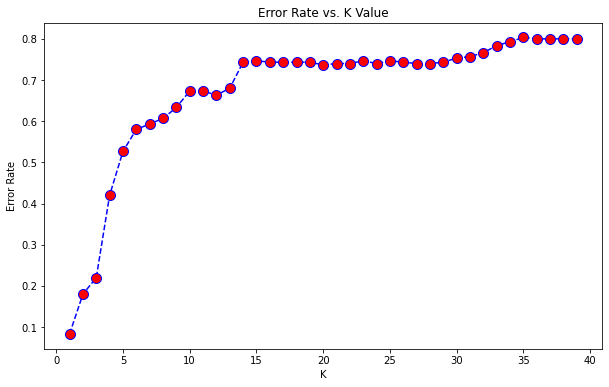

In [54]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy rtae')

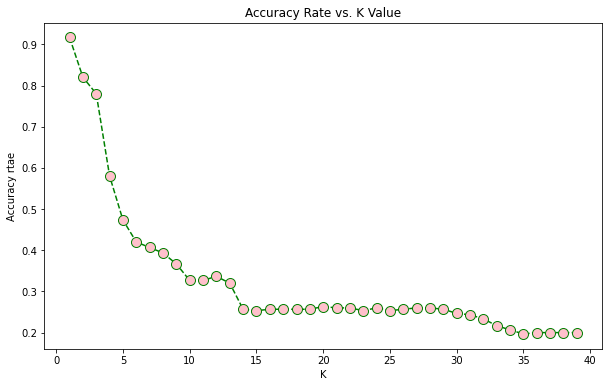

In [56]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy rtae')

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


              precision    recall  f1-score   support

           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         1
          25       0.50      1.00      0.67         1
          26       0.00      0.00      0.00         1
          29       1.00      1.00      1.00         1
          3

C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nexgits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarnin